# Forecasting - based on empirical data

This notebook describes how to use [Chi2Fit](https://hex.pm/packages/chi2fit) for simple forecasting. This is illustrated for a team that takes up work items, exercises their expertise to complete the work. It shows one way for answering the questions:

* duration - how many iterations does it take to complete a certain number of items?
* completed items - how many items can be completed in a certain number of iterations?

This note shows (a) what data to use, (b) how to read in the data, (c) estimate the average and variation to answer the above questions.

The advantages of this approach are:

* the data (delivery rate or throughput or production rate) needed is easy to obtain,
* straightforward way to obtain average and variation,
* relatively small number of data points are needed (15 - 50 at most),
* the data is empirical and based on what the team delivered in the (recent) past.

The disadvantages include:

* it assumes that the delivery rate of the team is constant over time,
* gathering of data is slow: every iteration provides an extra data point,
* it does not take into account errors and uncertainties in the data.

Some of the disadvantages are addressed in other notebooks.

#### Related links

Troy Magennis has written excellent [tooling](http://focusedobjective.com/free-tools-resources/) that supports all of features demonstrated in this note and many more.

## How to use this notebook

1. Copy your team's data in [`In[2]`](#Team-data)
1. Change any simulation parameters in [`In[4]`](#Simulation-settings)
1. Run the simulation to [forecast duration](#Forecast:-Duration)
1. Run the simulation to [forecast the number of completed item](#Forecast:-Completed-items)

## Table of contents

* [Set-up](#Set-up)
* [Data and simulation set-up](#Data-and-simulation-set-up)
* [Simple forecast using the empirical data](#Simple-forecast-using-the-empirical-data)
    * [Forecast: Duration](#Forecast:-Duration)
    * [Forecast: Completed items](#Forecast:-Completed-items)
* [References](#References)

## Set-up

In [1]:
alias Chi2fit.Utilities, as: U
alias Gnuplotlib, as: P

Gnuplotlib

## Data and simulation set-up

As an example consider the throughput of completed backlog items. At the end of a fixed time period we count the number of backlog items that a team completes. Partially completed items are excluded from the count.

The numbers corresponding to the most recent times are at the head of the list.

#### Team data

In [2]:
data = [3,3,4,4,7,5,1,11,5,6,3,6,6,5,4,10,4,5,8,2,4,12,5]

[3, 3, 4, 4, 7, 5, 1, 11, 5, 6, 3, 6, 6, 5, 4, 10, 4, 5, 8, 2, 4, 12, 5]

A visualization of the data using a histogram or frequency chart is shown below. The horizontal axis indicates the number of completed items in an iteration. The vertical axis shows how often a certain throughput occured.

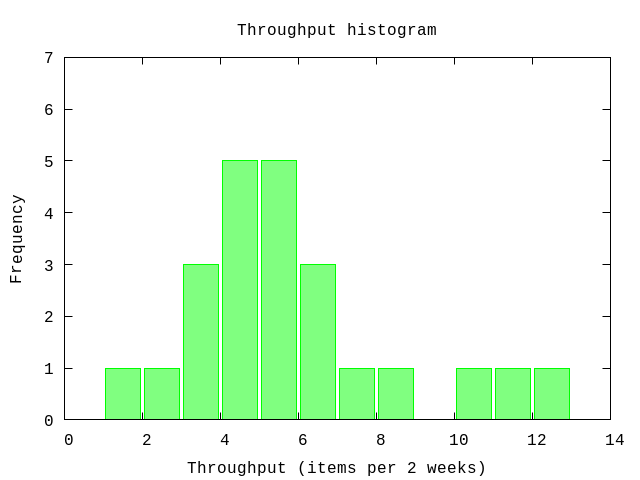

In [3]:
P.histogram(data,
    plottitle: "Throughput histogram",
    xlabel: "Throughput (items per 2 weeks)",
    ylabel: "Frequency",
    yrange: '[0:7]')
:"this is an inline image"

#### Simulation settings

Other parameters that affect the forecasting are listed below. Please adjust to your needs.

In [4]:
# The size of the backlog, e.g. 100 backlog items
size = 100

# Number of iterations to use in the Monte Carlo
iterations = 1000

# Number of iterations to forecast the number of completed items
periods = 6

6

## Simple forecast using the empirical data

Using the (throughput) data we simulate an iteration by randomly drawing a number from the data. We do this repeatedly until the sum of the numbers equals or exceeds the size of the backlog. The number of draws needed to deplete the backlog is the estimate of many iterations it takes to complete all backlog items.

We just described 1 simulation or run. If we do this many times we will find a different number of iterations needed to finish all items. This gives an average and variation.

A variation on this is to draw a fixed number of times and sum the numbers that have been drawn. The sum is an estimate of the number of items we expect to complete in this many iterations.

This procedure is also known as Monte Carlo and was first described in [[1]](#References). A gentle introduction to Monte Carlo simulations is given in [[2]](#References).

#### Error

Due to the uncertainty in the number of completed items per iteration, the simulation runs will give different results. One can calculate the average and variance of the results. The square root of the variance approximates the error in the estimate. Because it originates from the statistical variation in the throughput data, this erroris known as a _statistical error_.

#### Forecast: Duration

Using the histogram data for the throughput we perform a Monte Carlo simulation to get an estimation for the number of iterations needed to deplete the backlog. Since for a large enough number of samples results of a Monte Carlo simulation approximate the normal distribution. This provides a range for the uncertainty of the number of iterations. We express this as a probability using percentages.

In [5]:
{avg,sd,all} = U.mc iterations, U.forecast_duration(data, size),collect_all?: true
U.display {avg,sd,:+}

50%    => 20.0 units
84%    => 22.0 units
97.5%  => 24.0 units
99.85% => 27.0 units


:ok

The interpretation is that in 50% of the (simulation) runs all items have been completed with 20 iterations. And in 84% of the runs this took 22 iterations. We expect that in 16% of the times it will take more than 22 iterations to complete all items.

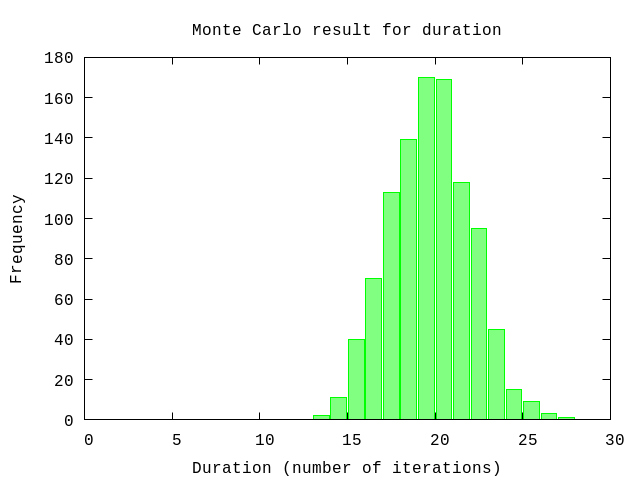

In [6]:
P.histogram(all,
    plottitle: "Monte Carlo result for duration",
    xlabel: "Duration (number of iterations)",
    ylabel: "Frequency",
    xrange: '[0:30]')
:"this is an inline image"

#### Forecast: Completed items

In [8]:
{avg,sd,all} = U.mc iterations, U.forecast_items(data,periods), collect_all?: true
U.display {avg,sd,:-}

50%    => 33.0 units
84%    => 26.0 units
97.5%  => 20.0 units
99.85% => 13.0 units


:ok

Here, the interpretation is that in 50% of the runs 32 work items or more have been completed in 6 iterations. While in 84% of the runs 26 or more work items have been completed.
Finally, we expect with near certainty to always complete 13 work items or more.

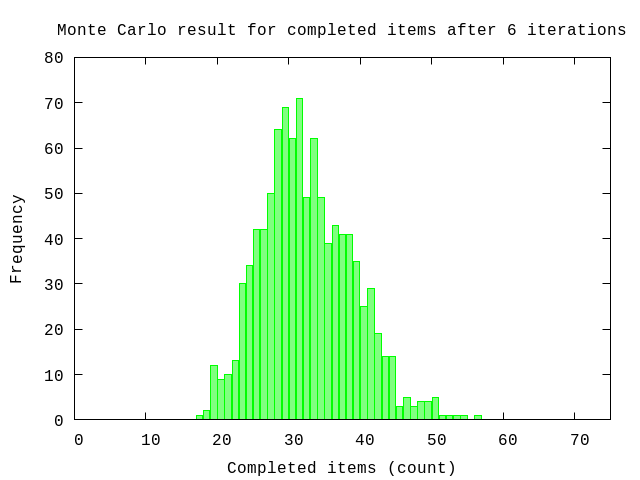

In [9]:
P.histogram(all,
    plottitle: "Monte Carlo result for completed items after #{periods} iterations",
    xlabel: "Completed items (count)",
    ylabel: "Frequency",
    xrange: '[0:75]')
:"this is an inline image"

## References

[1] Metropolis, N.; Ulam, S. (1949). "The Monte Carlo Method". Journal of the American Statistical Association. 44 (247): 335–341.

[2] Kroese, D. P.; Taimre, T.; Botev, Z.I. (2011). Handbook of Monte Carlo Methods. New York: John Wiley & Sons. p. 772. ISBN 978-0-470-17793-8.